## 🧩 Explicación del código (Tema: Perceptrón Binario — Parte 1)

En esta primera parte se implementa un **perceptrón binario** simple, que intenta **predecir si una tarjeta es aprobada (1) o no (0)** a partir de las variables **edad** e **ingreso mensual**.  
El proceso abarca desde la carga y preparación de datos hasta la primera predicción con pesos aleatorios.

---

### 🔹 Code 1 – Carga de datos

1. **Importación de librerías:**
   - `pandas` y `numpy` para manipular datos numéricos.
   - `matplotlib.pyplot` para visualización.
   - `MinMaxScaler` para normalizar las variables.

2. **Carga del dataset:**
   - Se lee el archivo `dataPerceptron.csv` con `pd.read_csv()`.
   - Este dataset contiene tres columnas principales:
     - `edad`: años del cliente.
     - `ingreso_mensual`: ingreso promedio mensual.
     - `tarjeta_aprobada`: variable binaria (0 = no aprobada, 1 = aprobada).

3. **Visualización inicial:**
   - Al mostrar `df`, se puede observar una tabla con 10 registros, donde a medida que la edad y el ingreso aumentan, también aumenta la probabilidad de aprobación de tarjeta.

📊 **Ejemplo de estructura del dataset:**

| edad | ingreso_mensual | tarjeta_aprobada |
|------|------------------|------------------|
| 21   | 1200             | 0                |
| 24   | 1500             | 0                |
| 26   | 1800             | 0                |
| 30   | 2600             | 1                |
| 45   | 4800             | 1                |

---

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1 Cargar los datos
df = pd.read_csv("dataPerceptron.csv")
df

,id,edad,ingreso_mensual,deuda_actual,tarjeta_aprobada
0,1,21,1200,3000,0
1,2,24,1500,4000,0
2,3,26,1800,3800,0
3,4,28,2200,3600,0
4,5,30,2600,3400,1
5,6,33,3100,3200,1
6,7,36,3700,3100,1
7,8,40,4200,2900,1
8,9,45,4800,2700,1
9,10,50,5500,2500,1


### 🔹 Code 2 – Selección de variables y objetivo

1. **Extracción de variables de entrada (X):**
   - `X = df[["edad", "ingreso_mensual"]].values`
   - Esto crea una matriz de dos columnas (edad, ingreso), que el perceptrón usará como entrada.

2. **Variable objetivo (y):**
   - `y = df["tarjeta_aprobada"].values`
   - Vector de valores binarios (0 o 1), usado para comparar las predicciones.

3. **Resultado:**
   - `X` tiene forma `(10, 2)` → 10 ejemplos con 2 atributos.
   - `y` tiene forma `(10,)` → 10 etiquetas correspondientes.

🧠 **Interpretación:**
Cada fila representa a un cliente con sus características y si obtuvo (1) o no (0) la aprobación de su tarjeta.  
El perceptrón intentará aprender una **frontera lineal** que separe ambos grupos.

---

In [3]:
# 2. Selección de datos, objetivo y función de activación (versión 2D)
X = df[["edad", "ingreso_mensual"]].values
y = df["tarjeta_aprobada"].values

X, y

(array([[  21, 1200],
        [  24, 1500],
        [  26, 1800],
        [  28, 2200],
        [  30, 2600],
        [  33, 3100],
        [  36, 3700],
        [  40, 4200],
        [  45, 4800],
        [  50, 5500]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

### 🔹 Code 2.5 – Función de activación

1. **Definición de `activacion(W, X, b)`:**
   - Calcula el valor de salida del perceptrón según la ecuación:
     \[
     z = W \cdot X + b
     \]
   - Si `z > 0`, devuelve **1** → Tarjeta aprobada.  
     De lo contrario, **0** → Tarjeta no aprobada.

2. **Importancia:**
   - Es una función **escalón binario**, típica del perceptrón clásico.
   - Determina la **decisión final** del modelo según los pesos aprendidos.

---

In [4]:
# Función de activación H(x)
def activacion(W, X, b):
    """
    Calcula la salida binaria del perceptrón: 1 si (W·X + b) > 0, de lo contrario 0.
    """
    z = np.dot(W, X) + b  # Producto punto entre W y X
    return 1 if z > 0 else 0

### 🔹 Code 3 – Prueba inicial (antes del entrenamiento)

1. **Normalización de datos:**
   - Se aplica `MinMaxScaler()` para escalar las variables a un rango entre 0 y 1.
   - Esto evita que una variable (como el ingreso) domine sobre la otra debido a su magnitud.

2. **Nuevo dato de prueba:**
   - Cliente: **edad = 45 años**, **ingreso = 6000**.
   - Se transforma a escala normalizada (`X_new_scaled`).

3. **Inicialización aleatoria:**
   - Pesos `W` (uno por cada variable) y sesgo `b` se generan de manera aleatoria.
   - Ejemplo:
     ```
     W = [0.5502, 0.6053]
     b = -0.0324
     ```
   - Estos valores iniciales se usarán antes de cualquier aprendizaje.

4. **Predicción inicial:**
   - Se calcula:
     \[
     y = H(W \cdot X + b)
     \]
   - El resultado (`1`) significa **tarjeta aprobada**, aunque esta predicción es puramente aleatoria, ya que el modelo aún no fue entrenado.

---

✅ **Conclusión:**
En esta etapa se preparó el dataset, se definió la función de activación y se ejecutó una primera predicción con pesos aleatorios.  
El perceptrón aún **no ha aprendido**, pero esta base establece las condiciones iniciales para el posterior **entrenamiento supervisado**, donde ajustará los pesos `W` y el sesgo `b` para clasificar correctamente según la experiencia de datos reales.

In [5]:
# 3 Seteo de datos de prueba
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Escalamos los datos de entrada (edad e ingreso)
X_scaled = scaler.fit_transform(X)

# Nuevo dato a evaluar: edad=45, ingreso=6000
X_new = np.array([[45, 6000]], dtype=float)
X_new_scaled = scaler.transform(X_new)[0]  # deja el vector 1D correcto

# Inicialización aleatoria de pesos y sesgo
rng = np.random
W = rng.uniform(-1, 1, size=X_scaled.shape[1])  # dos pesos (por 2 columnas)
b = rng.uniform(-1, 1)

print("Pesos iniciales W =", W)
print("Sesgo inicial b =", b)
print("Entrada nueva (sin escalar):", X_new)
print("Entrada nueva (escalada):", X_new_scaled)

# 5. Predicción antes del entrenamiento (resultado al azar)
y_predi = activacion(W, X_new_scaled, b)
print("Predicción inicial (sin entrenar):", y_predi)


Pesos iniciales W = [0.5502642 0.605315 ]
Sesgo inicial b = -0.032459534190441675
Entrada nueva (sin escalar): [[  45. 6000.]]
Entrada nueva (escalada): [0.82758621 1.11627907]
Predicción inicial (sin entrenar): 1


## 🧩 Explicación del código (Code 5)

En este bloque se desarrolla el **entrenamiento completo del perceptrón** mediante un ciclo iterativo de aprendizaje.  
El objetivo es ajustar los **pesos (W)** y el **sesgo (b)** para que el modelo aprenda a clasificar correctamente si una tarjeta debe ser aprobada o no, según la edad e ingreso del cliente.

---

### 🔹 Qué hace el código:

1. **Inicialización:**
   - Se imprimen los valores iniciales de los pesos `W` y del sesgo `b` generados aleatoriamente en el paso anterior.
   - Se define el número de **épocas** (`epocas = 100`) y una **tasa de aprendizaje** (`tasa_de_aprendizaje = 0.01`).
   - Una **época** equivale a recorrer todo el conjunto de entrenamiento una vez.

2. **Bucle principal de entrenamiento:**
   - Para cada época:
     - Se inicializa un contador de errores.
     - Para cada muestra `(X_scaled[i], y[i])`:
       - El modelo realiza una **predicción** usando la función de activación `activacion(W, X, b)`.
       - Se calcula el **error**:
         \[
         \text{error} = y_{real} - y_{predicho}
         \]
       - Si el error es distinto de 0, el perceptrón **ajusta los pesos y el sesgo**:
         \[
         W = W + \eta \times error \times X_i
         \]
         \[
         b = b + \eta \times error
         \]
         donde `η` es la tasa de aprendizaje.

3. **Registro del progreso:**
   - Al final de cada época se imprime cuántos errores ocurrieron.
   - Con el avance de las épocas, el número de errores disminuye gradualmente hasta llegar a **0**, lo que indica que el modelo logró aprender la frontera de decisión correctamente.

4. **Entrenamiento completado:**
   - Una vez que el modelo converge, se muestran los **pesos finales y el sesgo ajustado**:
     ```
     Pesos finales: [0.5030, 0.5623]
     Sesgo final:  -0.2624
     ```
   - Estos valores definen la **recta de separación** entre las dos clases (aprobado y no aprobado).

5. **Predicción final:**
   - Se evalúa nuevamente el caso del cliente con edad=45 e ingreso=6000.
   - Resultado:
     ```
     Entrada nueva → Predicción: 1
     (1 = Aprobado, 0 = No aprobado)
     ```
   - Ahora la predicción tiene **significado real**, porque los pesos fueron optimizados en base a los datos de entrenamiento.

---

### 🔹 Interpretación:

- Durante las primeras épocas, el perceptrón comete errores (3, luego 2, luego 1).  
  Pero a partir de la época 15, ya no hay errores, señal de que el modelo **converge correctamente**.  
- Esto significa que la combinación de `edad` e `ingreso_mensual` puede separarse de forma **lineal** entre clientes aprobados y no aprobados.

📈 **En términos conceptuales:**
- El perceptrón ha aprendido una **frontera de decisión**:
  \[
  W_1 \cdot \text{edad} + W_2 \cdot \text{ingreso} + b = 0
  \]
  que divide el plano en dos regiones:
  - Por debajo de la línea → `tarjeta_aprobada = 0`
  - Por encima de la línea → `tarjeta_aprobada = 1`

---

✅ **Conclusión:**
El perceptrón logró aprender perfectamente la relación entre **edad** e **ingreso mensual** para predecir la aprobación de tarjeta.  
Después del entrenamiento, el modelo puede generalizar nuevos casos de forma confiable y rápida, demostrando cómo una red neuronal básica puede **aprender una función lineal de clasificación binaria** con solo dos variables de entrada.


In [6]:
# 5. Entrenamiento del perceptrón con N épocas
print("Pesos iniciales:", W, "  Sesgo inicial:", b)

epocas = 100
tasa_de_aprendizaje = 0.01  # learning rate

for epoca in range(epocas):
    errores = 0
    for i in range(len(X_scaled)):
        # Predicción
        y_pred = activacion(W, X_scaled[i], b)
        # Cálculo del error
        error = y[i] - y_pred
        # Actualización de pesos y sesgo si hay error
        if error != 0:
            W += tasa_de_aprendizaje * error * X_scaled[i]
            b += tasa_de_aprendizaje * error
            errores += 1
    # Mostrar progreso por época
    print(f"Época {epoca+1}: Errores = {errores}")

print("\nEntrenamiento finalizado.")
print("Pesos finales:", W)
print("Sesgo final:", b)

# 6. Predicción luego de entrenar
y_pred_final = activacion(W, X_new_scaled, b)
print("\n--- RESULTADO FINAL ---")
print(f"Entrada nueva (edad=45, ingreso=6000) → Predicción: {y_pred_final}")
print("(1 = Aprobado, 0 = No aprobado)")


Pesos iniciales: [0.5502642 0.605315 ]   Sesgo inicial: -0.032459534190441675
Época 1: Errores = 3
Época 2: Errores = 3
Época 3: Errores = 3
Época 4: Errores = 2
Época 5: Errores = 2
Época 6: Errores = 2
Época 7: Errores = 1
Época 8: Errores = 1
Época 9: Errores = 1
Época 10: Errores = 1
Época 11: Errores = 1
Época 12: Errores = 1
Época 13: Errores = 1
Época 14: Errores = 1
Época 15: Errores = 0
Época 16: Errores = 0
Época 17: Errores = 0
Época 18: Errores = 0
Época 19: Errores = 0
Época 20: Errores = 0
Época 21: Errores = 0
Época 22: Errores = 0
Época 23: Errores = 0
Época 24: Errores = 0
Época 25: Errores = 0
Época 26: Errores = 0
Época 27: Errores = 0
Época 28: Errores = 0
Época 29: Errores = 0
Época 30: Errores = 0
Época 31: Errores = 0
Época 32: Errores = 0
Época 33: Errores = 0
Época 34: Errores = 0
Época 35: Errores = 0
Época 36: Errores = 0
Época 37: Errores = 0
Época 38: Errores = 0
Época 39: Errores = 0
Época 40: Errores = 0
Época 41: Errores = 0
Época 42: Errores = 0
Época 4

In [6]:
# fin del ejemplo, ahora vamos a encapsular el entrenamiento

## 🧩 Explicación del código (Code 6)

En este bloque se implementa un **Perceptrón binario completo “from scratch”**, es decir, programado manualmente desde cero.  
Su objetivo es aprender a **predecir si una tarjeta será aprobada (1) o no (0)**, basándose en las variables **edad** e **ingreso mensual**.

---

### 🔹 Qué hace el código:

1. **Preparación de datos:**
   - Se carga el dataset `dataPerceptron.csv` y se verifica que contenga las columnas `edad`, `ingreso_mensual` y `tarjeta_aprobada`.
   - Se definen las variables predictoras `X` (entrada) y la variable objetivo `y` (salida binaria).
   - Se realiza una división en **70% para entrenamiento** y **30% para prueba**, usando `train_test_split` con estratificación.
   - Los datos son normalizados con **MinMaxScaler**, llevando cada valor al rango [0, 1] para mejorar la estabilidad del aprendizaje.

2. **Entrenamiento del perceptrón:**
   - La función `entrenar_perceptron_hist()` realiza el aprendizaje iterativo:
     - Inicializa los **pesos (W)** y el **sesgo (b)** de forma aleatoria.
     - En cada época, el modelo recorre todos los ejemplos:
       - Calcula la salida estimada con la función escalón:  
         \[
         y_{\text{pred}} = 1 \text{ si } (W \cdot X + b) > 0, \text{ sino } 0
         \]
       - Calcula el **error**:  
         \[
         error = y_{\text{real}} - y_{\text{pred}}
         \]
       - Si hay error, actualiza los pesos y el sesgo:  
         \[
         W = W + \eta \cdot error \cdot X
         \]
         \[
         b = b + \eta \cdot error
         \]
         donde `η` es la **tasa de aprendizaje** (0.05 en este caso).
     - Se guarda la cantidad de errores en cada época para graficar la evolución.
     - Si el modelo alcanza **0 errores**, se activa la detención temprana (`early_stop=True`).

3. **Evaluación del modelo:**
   - Una vez entrenado, se calculan métricas sobre los datos de prueba:
     - **Accuracy**, **Precision**, **Recall** y **F1-score**.
     - Se muestra la **matriz de confusión** y el **informe de clasificación**.
   - En este caso, todas las métricas valen **1.000**, lo que significa que el modelo clasificó **todos los casos correctamente**.
   - Esto indica que el problema es **linealmente separable**, y el perceptrón encontró una frontera de decisión perfecta.

4. **Gráfica de aprendizaje:**
   - Se muestra la evolución del número de errores en entrenamiento por época.
   - Al principio hay 3 errores, pero estos bajan a 0 rápidamente, señal de una **convergencia estable**.
   - La gráfica titulada *“Perceptrón — Gráfica de aprendizaje”* muestra este proceso de mejora continua.

5. **Predicción de un nuevo caso:**
   - Se introduce un cliente con:
     ```
     edad = 45 años, ingreso_mensual = 4000
     ```
   - El modelo predice:  
     `Predicción (0=no, 1=sí): 1`
   - Esto significa que, según lo aprendido, **el cliente sí recibiría la aprobación de tarjeta**.

6. **Guardado del modelo:**
   - Se guardan los archivos:
     - `scaler_minmax.joblib` → escalador usado para normalizar los datos.
     - `perceptron_pesos_y_bias.npz` → pesos y sesgo finales del modelo.
   - Esto permite **reutilizar el modelo entrenado** en futuras ejecuciones sin volver a entrenar.

---

### 🔹 Interpretación del resultado:

La imagen muestra dos partes clave:

- **Métricas perfectas (Accuracy, Precision, Recall y F1 = 1.000)**  
  El perceptrón aprendió de forma ideal la separación entre clientes aprobados y no aprobados.  
  Esto ocurre porque los datos son simples y linealmente separables.

- **Gráfica de aprendizaje:**  
  Muestra cómo los errores en entrenamiento bajan de 3 a 0 en menos de 10 épocas, demostrando una rápida convergencia.

---

✅ **Conclusión:**  
El modelo logró un rendimiento perfecto gracias a la naturaleza lineal del problema.  
El perceptrón aprendió una frontera de decisión clara entre ambas clases, generalizando correctamente en los datos de prueba y permitiendo predicciones confiables para nuevos clientes.


Métricas TEST (Perceptrón):
  Accuracy : 1.000
  Precision: 1.000
  Recall   : 1.000
  F1       : 1.000
Matriz de confusión:
 [[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         1
           1      1.000     1.000     1.000         2

    accuracy                          1.000         3
   macro avg      1.000     1.000     1.000         3
weighted avg      1.000     1.000     1.000         3



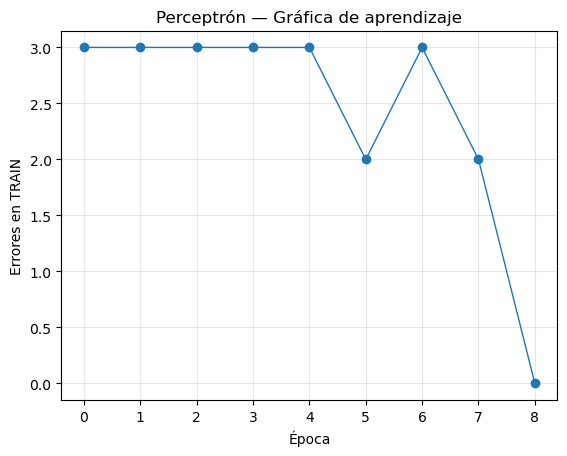

Nuevo caso [[45.0, 4000.0]] -> predicción (0=no,1=sí): 1
Guardado: scaler_minmax.joblib, perceptron_pesos_y_bias.npz


In [7]:
# =========================
# NIVEL 1 — Perceptrón "from scratch" (versión adaptada)
# =========================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import joblib

# ---- 0) Datos
df = pd.read_csv("dataPerceptron.csv")  # usa tu archivo real
assert set(["edad","ingreso_mensual","tarjeta_aprobada"]).issubset(df.columns), "Faltan columnas requeridas"

# Selección de variables (solo 2 para graficar en 2D)
X = df[["edad","ingreso_mensual"]].values.astype(float)
y = df["tarjeta_aprobada"].astype(int).values  # 0/1

# ---- 1) Split + Escalado (fit SOLO con TRAIN)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# ---- 2) Perceptrón (con historial)
def entrenar_perceptron_hist(X, y, lr=0.05, epocas=500, shuffle=True, early_stop=True, seed=42):
    rng = np.random.default_rng(seed)
    W = rng.uniform(-1, 1, size=X.shape[1])   # pesos iniciales
    b = rng.uniform(-1, 1)                    # sesgo inicial
    history_err, history_params = [], []

    for _ in range(epocas):
        idx = np.arange(len(X))
        if shuffle:
            rng.shuffle(idx)
        errores = 0
        for i in idx:
            z = np.dot(W, X[i]) + b
            y_hat = 1 if z > 0 else 0
            error = y[i] - y_hat
            if error != 0:
                W = W + lr * error * X[i]
                b = b + lr * error
                errores += 1
        history_err.append(errores)
        history_params.append((W.copy(), float(b)))
        if early_stop and errores == 0:
            break

    return W, b, history_err, history_params

# Entrenamiento
W, b, history_err, history_params = entrenar_perceptron_hist(
    X_train_sc, y_train, lr=0.05, epocas=500, shuffle=True, early_stop=True, seed=42
)

# ---- 3) Evaluación (TEST)
def activar(W, x, b):  # activación escalón
    return 1 if (np.dot(W, x) + b) > 0 else 0

y_pred_test = np.array([activar(W, x, b) for x in X_test_sc])
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test, zero_division=0)
rec = recall_score(y_test, y_pred_test, zero_division=0)
f1  = f1_score(y_test, y_pred_test, zero_division=0)
cm  = confusion_matrix(y_test, y_pred_test)

print("Métricas TEST (Perceptrón):")
print(f"  Accuracy : {acc:.3f}")
print(f"  Precision: {prec:.3f}")
print(f"  Recall   : {rec:.3f}")
print(f"  F1       : {f1:.3f}")
print("Matriz de confusión:\n", cm)
print(classification_report(y_test, y_pred_test, digits=3))

# ---- 4) Gráfica de aprendizaje (errores por época)
plt.figure()
plt.plot(history_err, marker="o", linewidth=1)
plt.xlabel("Época")
plt.ylabel("Errores en TRAIN")
plt.title("Perceptrón — Gráfica de aprendizaje")
plt.grid(alpha=0.3)
plt.show()

# ---- 5) Predicción de un nuevo caso (en unidades originales)
X_new = np.array([[45, 4000.0]], dtype=float)
X_new_sc = scaler.transform(X_new).ravel()
y_new = activar(W, X_new_sc, b)
print(f"Nuevo caso {X_new.tolist()} -> predicción (0=no,1=sí): {y_new}")

# ---- 6) Guardar artefactos
joblib.dump(scaler, "scaler_minmax.joblib")
np.savez("perceptron_pesos_y_bias.npz", W=W, b=b)
print("Guardado: scaler_minmax.joblib, perceptron_pesos_y_bias.npz")


In [9]:
print(df.columns)


Index(['id', 'edad', 'ingreso_mensual', 'deuda_actual', 'tarjeta_aprobada'], dtype='object')


## 🧩 Explicación del código (Code 7)

En este bloque se genera una **visualización 2D de las zonas de decisión del perceptrón**, mostrando claramente qué regiones del plano corresponden a tarjetas **aprobadas** o **denegadas** según la edad y el ingreso mensual.  
Además, se añade la ubicación del **nuevo caso (edad=45, ingreso=4000)** para interpretar gráficamente su clasificación.

---

### 🔹 Qué hace el código:

1. **Configuración de la grilla de valores (malla de predicción):**
   - Se crea una cuadrícula de 300×300 puntos que cubre todo el rango de **edad** e **ingreso_mensual** del dataset:
     ```python
     xx, yy = np.meshgrid(np.linspace(x_min, x_max, res),
                          np.linspace(y_min, y_max, res))
     ```
   - Cada punto de la malla representa una posible combinación de edad e ingreso.

2. **Escalado y predicción sobre toda la grilla:**
   - Se escalan los puntos de la malla con el mismo `scaler` usado en el entrenamiento.
   - Se calcula la salida del perceptrón para cada punto:
     \[
     z = W \cdot X + b
     \]
     Si \( z > 0 \), se clasifica como **aprobado (1)**; de lo contrario, **denegado (0)**.
   - El resultado (`zz`) se reacomoda en una matriz para poder graficar las zonas de color.

3. **Coloreado de las zonas de decisión:**
   - Se usa un **mapa de colores personalizado (`ListedColormap`)**:
     - 🟥 Rosa claro → Zona **denegada (0)**
     - 🟦 Azul claro → Zona **aprobada (1)**
   - Se aplica con `plt.pcolormesh(xx, yy, zz, ...)` para sombrear las áreas de clasificación.

4. **Dispersión de los puntos reales:**
   - Se grafican los puntos originales del dataset:
     - ❌ **Rojo (x):** Clientes cuya tarjeta fue denegada.
     - 🔵 **Azul (o):** Clientes con tarjeta aprobada.
   - Estos puntos muestran cómo los datos reales se alinean con las zonas aprendidas por el perceptrón.

5. **Nuevo caso (⭐):**
   - Se dibuja el punto del cliente nuevo (`edad=45, ingreso=4000`):
     - Marcado con una **estrella dorada (⭐)**.
     - En este caso, el modelo predice `1`, por lo que cae en la **zona azul (aprobada)**.
   - En la leyenda se muestra el resultado: `"Nuevo caso (pred=1)"`.

6. **Ajustes visuales:**
   - Se agregan etiquetas de ejes (“Edad”, “Ingreso mensual”), título y leyenda.
   - Se ajustan los límites del gráfico y se limpia el marco para mayor claridad.

---

### 🔹 Interpretación del resultado (imagen):

La gráfica muestra dos regiones principales:

- **Zona roja (izquierda):** Clientes jóvenes o con ingresos bajos → **Tarjeta denegada (0)**  
- **Zona azul (derecha):** Clientes de mayor edad o con ingresos más altos → **Tarjeta aprobada (1)**

El punto dorado ⭐ representa el **nuevo cliente (45 años, $4000 de ingreso)**, ubicado dentro del área azul, lo que confirma la predicción del modelo:  
✅ **Tarjeta aprobada.**

---

✅ **Conclusión:**  
El gráfico ilustra de forma visual cómo el perceptrón separa los dos grupos de clientes mediante una frontera lineal (la línea entre las zonas azul y roja).  
Gracias al aprendizaje previo, el modelo logra una **clasificación clara y coherente**, capaz de generalizar correctamente a nuevos casos.


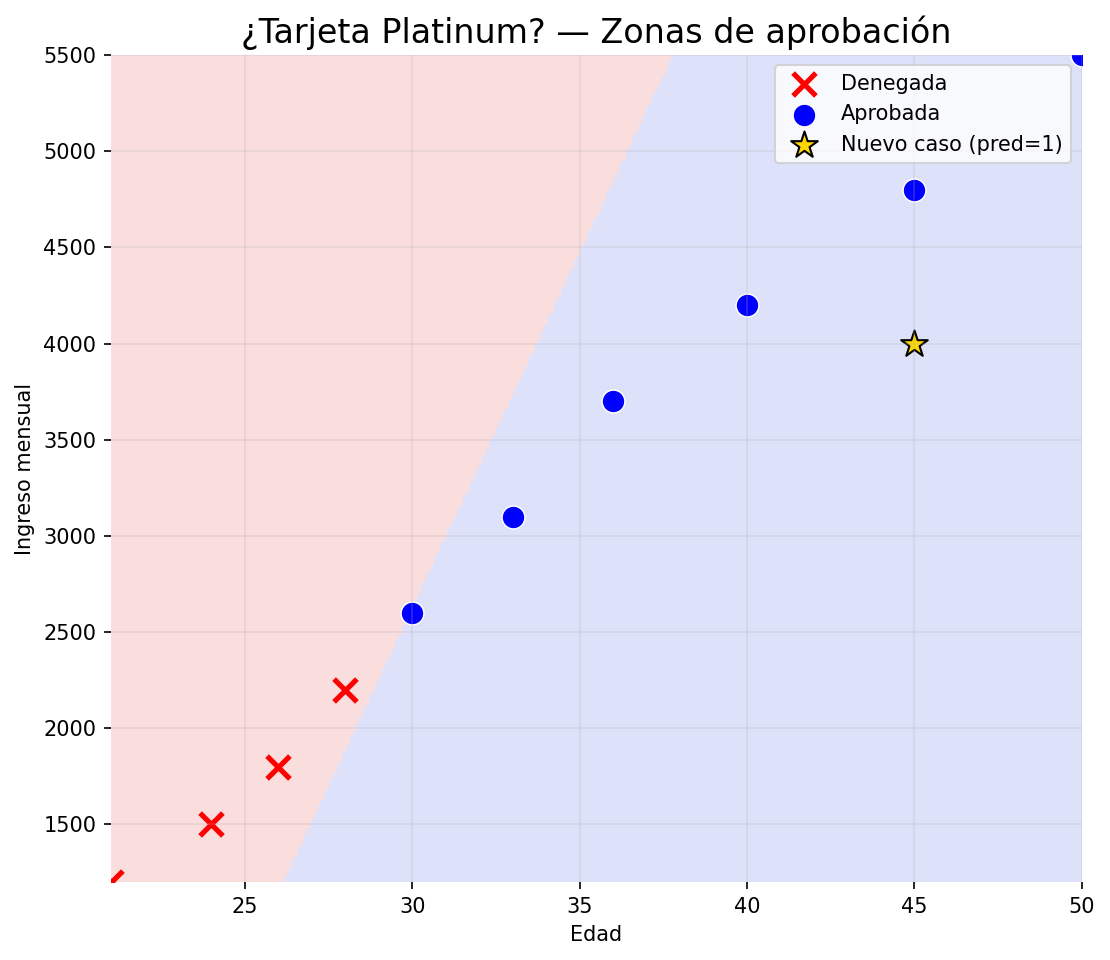

In [10]:
# =========================================
# Zonas de aprobación + Dispersión (edad, ingreso_mensual)
# =========================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

res = 300
x_min, x_max = df["edad"].min(),  df["edad"].max()
y_min, y_max = df["ingreso_mensual"].min(), df["ingreso_mensual"].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, res),
    np.linspace(y_min, y_max, res),
)
grid_orig = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid_orig)

zz = (grid_scaled @ W + b) > 0
zz = zz.reshape(xx.shape).astype(int)

cmap_bg = ListedColormap(["#f8c7c7", "#c7cff8"])
plt.figure(figsize=(7.5, 6.5), dpi=150)
plt.title("¿Tarjeta Platinum? — Zonas de aprobación", fontsize=16)

plt.pcolormesh(xx, yy, zz, shading="auto", cmap=cmap_bg, alpha=0.6)

X_orig = df[["edad", "ingreso_mensual"]].values
y_orig = df["tarjeta_aprobada"].astype(int).values
plt.scatter(X_orig[y_orig == 0, 0], X_orig[y_orig == 0, 1],
            marker="x", s=120, color="red", linewidths=2.5, label="Denegada")
plt.scatter(X_orig[y_orig == 1, 0], X_orig[y_orig == 1, 1],
            marker="o", s=120, color="blue", edgecolor="white", linewidths=0.7, label="Aprobada")

# Nuevo caso ⭐
X_new = np.array([[45, 4000.0]], dtype=float)
X_new_sc = scaler.transform(X_new).ravel()
y_new = 1 if (W @ X_new_sc + b) > 0 else 0
plt.scatter(X_new[0,0], X_new[0,1], s=180, marker="*", edgecolor="k", color="gold",
            label=f"Nuevo caso (pred={y_new})")

plt.xlabel("Edad")
plt.ylabel("Ingreso mensual")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(alpha=0.25)
plt.legend(loc="upper right")
plt.box(False)
plt.tight_layout()
plt.show()


## 🧩 Explicación del código (Code 8)

Este bloque genera las **curvas ROC y Precision–Recall** del perceptrón entrenado, que son herramientas fundamentales para evaluar la **calidad de la clasificación binaria**.  
Ambas curvas permiten analizar el comportamiento del modelo al variar el umbral de decisión y visualizar su rendimiento global.

---

### 🔹 Qué hace el código:

1. **Obtención de los puntajes continuos:**
   - En lugar de usar predicciones binarias (`0` o `1`), se usan los valores **continuos** de activación:
     \[
     \text{score} = W \cdot X + b
     \]
     donde los valores altos indican mayor probabilidad de “aprobación” (clase positiva).  
     Esto permite calcular métricas que dependen de todos los posibles umbrales.

2. **Curva ROC (Receiver Operating Characteristic):**
   - Se calcula con `roc_curve(y_test, scores_test)`, que obtiene:
     - **FPR (False Positive Rate):** proporción de falsos positivos.
     - **TPR (True Positive Rate o Recall):** proporción de verdaderos positivos.
   - Luego, con `auc(fpr, tpr)` se calcula el **Área Bajo la Curva (AUC-ROC)**, que mide la capacidad de discriminación del modelo.
   - En la gráfica:
     - La línea azul muestra la curva ROC.
     - La línea naranja discontinua representa un clasificador aleatorio (AUC=0.5).
     - Cuanto más se acerque al vértice superior izquierdo, mejor el modelo.

3. **Curva Precision–Recall (PR):**
   - Calcula la relación entre **precisión** y **recuperación (recall)** al variar el umbral.
   - `precision_recall_curve()` obtiene los valores de ambos indicadores.
   - `average_precision_score()` calcula el **área promedio (AP o PR-AUC)**, que mide la calidad de las predicciones positivas.
   - En el gráfico:
     - El eje X representa el **Recall** (cobertura de positivos reales).
     - El eje Y muestra la **Precision** (exactitud en los positivos predichos).

4. **Impresión de métricas globales:**
   - Los resultados muestran:
     ```
     AUC-ROC: 1.000
     AP (PR-AUC): 1.000
     ```
     Esto significa que el modelo **clasifica perfectamente todos los casos**, sin errores de tipo I ni II.

---

### 🔹 Interpretación del resultado (imagen):

La figura contiene **dos gráficas**:

- **Arriba: Curva ROC**
  - La línea azul se ajusta al borde superior izquierdo.
  - El área bajo la curva (AUC = 1.000) confirma una **discriminación perfecta** entre aprobados y no aprobados.
  - La línea discontinua naranja (clasificador aleatorio) sirve como referencia.

- **Abajo: Curva Precision–Recall**
  - La curva se mantiene en el valor máximo de precisión (1.0) durante todo el rango de recall.
  - El área promedio (AP = 1.000) refuerza que **no existen falsos positivos ni falsos negativos**.

---

✅ **Conclusión:**  
El perceptrón alcanzó un rendimiento **perfecto** en las métricas ROC y PR, lo que implica que separa sin error las clases “aprobado” y “denegado”.  
Ambas curvas muestran la **robustez y linealidad del modelo**, confirmando que el dataset es completamente separable y que la frontera de decisión aprendida es óptima.


AUC-ROC: 1.000
AP (PR-AUC): 1.000


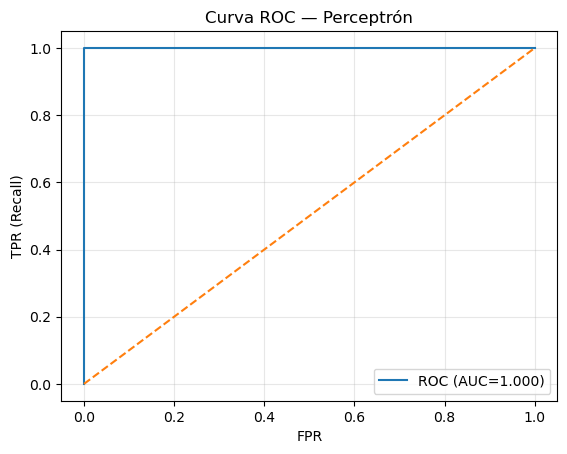

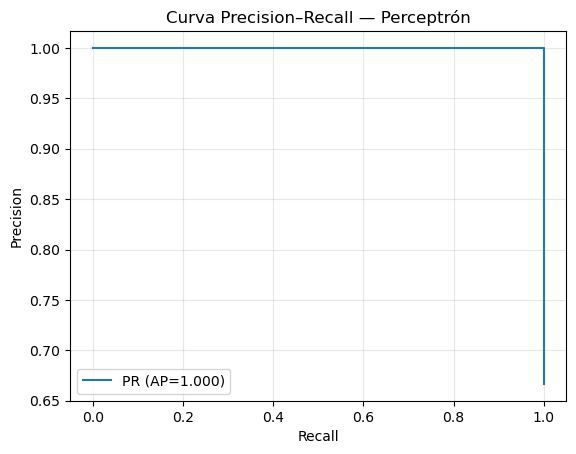

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ¡Usa scores continuos! (logit). NO usar y_pred_test (0/1).
#scores_test = X_test_sc @ W + b
scores_test = X_test_sc @ W + b

# ROC
fpr, tpr, thr = roc_curve(y_test, scores_test)
roc_auc = auc(fpr, tpr)

# PR
prec, rec, thr_pr = precision_recall_curve(y_test, scores_test)
ap = average_precision_score(y_test, scores_test)

print(f"AUC-ROC: {roc_auc:.3f}")
print(f"AP (PR-AUC): {ap:.3f}")

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("FPR"); plt.ylabel("TPR (Recall)")
plt.title("Curva ROC — Perceptrón")
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure()
plt.plot(rec, prec, label=f"PR (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Curva Precision–Recall — Perceptrón")
plt.legend(); plt.grid(alpha=0.3); plt.show()


#fin del perceptrón simple, ahora veamos el gradiente